## Imports

In [1]:
import numpy as np
from math import cos, sin, pi, sqrt
import matplotlib.pyplot as plt

## config

In [2]:
threshold = 0.1

In [3]:
def calculate_v_w (x_current, y_current, theta_current, x_destination, y_destination): 
  delta_x = x_destination - x_current
  delta_y = y_destination - y_current
  ro = sqrt((delta_x)**2 + (delta_y)**2)
  alpha = -theta_current + np.arctan2(delta_y, delta_x)
  betha = -(alpha + theta_current)
  k_ro = 3
  k_betha = -1.5
  k_alpha = 8
  v = k_ro * ro 
  w = k_alpha * alpha + k_betha * betha
  return v, w

In [4]:
def calculate_wheel_velocity (v, w, r_wheel, l): 
  phi_dot_wheel_1 = (v + (l*w)/2)/ r_wheel 
  phi_dot_wheel_2 = (v - (l*w))/2/ r_wheel
  return phi_dot_wheel_1, phi_dot_wheel_2

In [5]:
def transfer_to_initial (phi_dot_wheel_1, phi_dot_wheel_2, theta, l, r_wheel): 
  angle = -1 * theta
  v = r_wheel * (phi_dot_wheel_1 - phi_dot_wheel_2) / l 
  w = r_wheel * (phi_dot_wheel_1 + phi_dot_wheel_2) / 2
  transfer_matrix = np.array([[cos(angle),      sin(angle), 0], 
                              [-1 * sin(angle), cos(angle), 0], 
                              [0,               0,          1]])
  z_dot_initial = np.dot(transfer_matrix, np.array([[v], [0], [w]]))

  v_x_initial = z_dot_initial[0][0]
  v_y_initial = z_dot_initial[1][0]
  return v_x_initial, v_y_initial

In [26]:
def plot_path(x_initial, 
              y_initial,
              theta_initial, 
              x_destination, 
              y_destination,  
              r_wheel, 
              l, 
              delta_t = 0.001, 
              label='1'):
  x_current = x_initial
  y_current = y_initial
  theta_current = theta_initial
  x_path = [x_initial]
  y_path = [y_initial]
  while (abs(x_current - x_destination) >= threshold) or (abs(y_current - y_destination) >= threshold): 
    v, w = calculate_v_w(x_current, y_current, theta_current, x_destination, y_destination)
    phi_dot_wheel_1, phi_dot_wheel_2 = calculate_wheel_velocity (v, w, r_wheel, l)
    v_x_initial, v_y_initial = transfer_to_initial(phi_dot_wheel_1, phi_dot_wheel_2, theta_current, l/2, r_wheel)
    x_current += delta_t * v_x_initial
    x_path.append(x_current)
    y_current += delta_t * v_y_initial
    y_path.append(y_current)
    theta_current += delta_t * w 
  plt.plot(x_path, y_path, label)

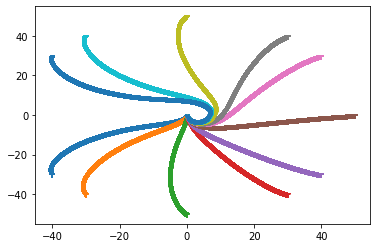

In [27]:
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=-40, y_destination=-30,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=-30, y_destination=-40,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=0, y_destination=-50,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=30, y_destination=-40,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=40, y_destination=-30,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=50, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=40, y_destination=30,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=30, y_destination=40,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=0, y_destination=50,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=-30, y_destination=40,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=0, theta_initial=-pi/2, x_destination=-40, y_destination=30,  r_wheel=1, l=5)
plt.show()

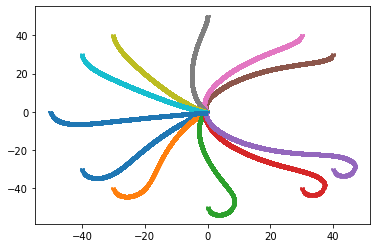

In [30]:
plot_path(x_initial=-40, y_initial=-30, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=-30, y_initial=-40, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=-50, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=30, y_initial=-40, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=40, y_initial=-30, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=40, y_initial=30, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=30, y_initial=40, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=0, y_initial=50, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=-30, y_initial=40, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=-40, y_initial=30, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plot_path(x_initial=-50, y_initial=0, theta_initial=-pi/2, x_destination=0, y_destination=0,  r_wheel=1, l=5)
plt.show()